In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'C:\Users\mukes\Downloads\Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [9]:
df1 = df.rename(columns={'Length1':'VerticalLen', 'Length2':'DiagonalLen', 'Length3':'CrossLen'})
df1.head()

,Species,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Species      159 non-null    object 
 1   Weight       159 non-null    float64
 2   VerticalLen  159 non-null    float64
 3   DiagonalLen  159 non-null    float64
 4   CrossLen     159 non-null    float64
 5   Height       159 non-null    float64
 6   Width        159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [11]:
df1.corr()

,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
VerticalLen,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
DiagonalLen,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
CrossLen,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

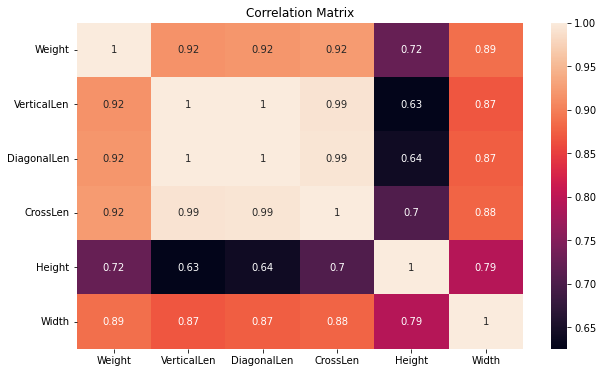

In [12]:
plt.rcParams['figure.figsize'] = (10, 6)
sns.heatmap(df1.corr(), annot = True)
plt.title('Correlation Matrix')

In [13]:
df2 = df1.drop(columns=['VerticalLen', 'DiagonalLen', 'CrossLen'], axis = 1)
print('New dimension of dataset is= ', df2.shape)
df2.head(3)


New dimension of dataset is=  (159, 4)


,Species,Weight,Height,Width
0,Bream,242.0,11.5200,4.0200
1,Bream,290.0,12.4800,4.3056
2,Bream,340.0,12.3778,4.6961


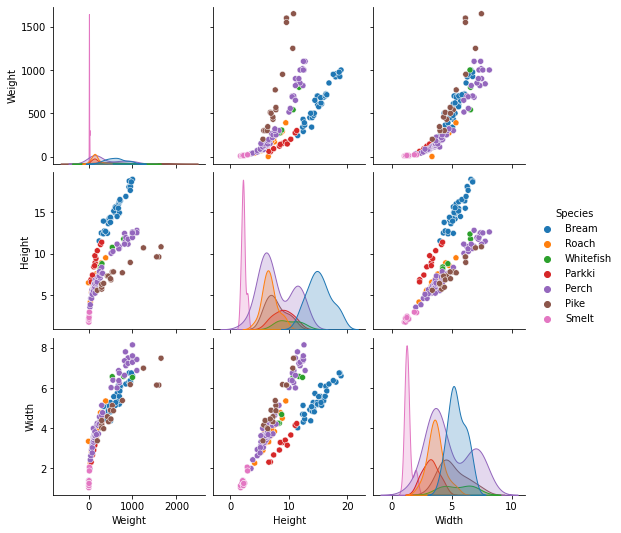

In [14]:
sns.pairplot(df2, kind = 'scatter', hue ='Species')

In [16]:
def outlier_detection(dataframe):
    Q1 = dataframe.quantile(0.25)
    Q3 = dataframe.quantile(0.75)
    IQR = Q3 - Q1
    upper_bracket = Q3 + 1.5 * IQR
    lower_bracket = Q1 - 1.5 * IQR
    outlier = dataframe[(dataframe > upper_bracket) | (dataframe < lower_bracket)]
    return outlier

Text(0.5, 1.0, 'Outlier Detection Based on Weight')

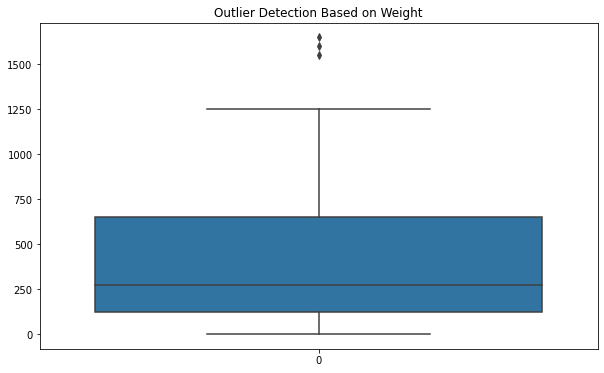

In [17]:
sns.boxplot(data = df2['Weight'])
plt.title('Outlier Detection Based on Weight')

In [18]:
for column in df2.columns[1:]:
    print('\n Outliers in column "%s" ' %column)
    outlier = outlier_detection(df2[column])
    print(outlier)


 Outliers in column "Weight" 
142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64

 Outliers in column "Height" 
Series([], Name: Height, dtype: float64)

 Outliers in column "Width" 
Series([], Name: Width, dtype: float64)


In [19]:
df_temp = df2.drop(['Weight'], axis = 'columns')


In [21]:
df_temp.head()

,Species,Height,Width
0,Bream,11.5200,4.0200
1,Bream,12.4800,4.3056
2,Bream,12.3778,4.6961
3,Bream,12.7300,4.4555
4,Bream,12.4440,5.1340


Text(0.5, 1.0, 'Outlier Detection For Pearch Species')

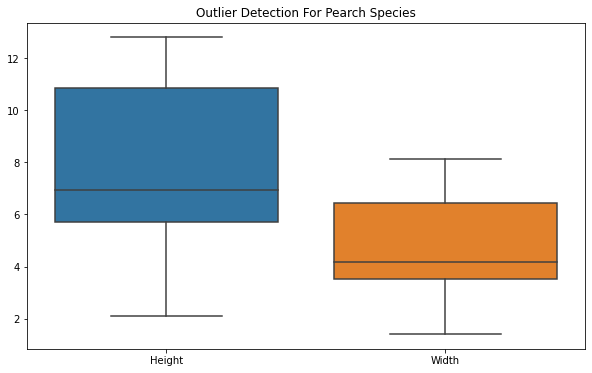

In [20]:
sns.boxplot(data = df_temp[df_temp.Species == 'Perch'])
plt.title('Outlier Detection For Pearch Species')

In [26]:
df_perch = df2[df2.Species == 'Perch']
for column in df_perch.columns[1:]:
    print('\n Outliers in columns "%s" ' %column)
    outlier = outlier_detection(df_perch[column])
    print(outlier)


 Outliers in columns "Weight" 
Series([], Name: Weight, dtype: float64)

 Outliers in columns "Height" 
Series([], Name: Height, dtype: float64)

 Outliers in columns "Width" 
Series([], Name: Width, dtype: float64)


Text(0.5, 1.0, 'Outlier Detection For Bream Species')

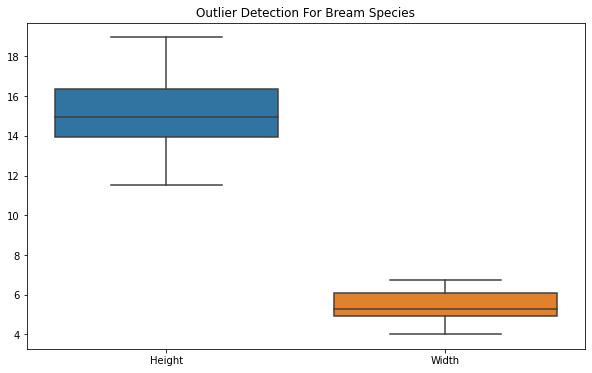

In [28]:
sns.boxplot(data = df_temp[df_temp.Species =='Bream'])
plt.title('Outlier Detection For Bream Species')

In [30]:
df_bream = df2[df2.Species == 'Bream']
for column in df_bream.columns[1:]:
    print('\nOutliers in column "%s" ' % column)
    outlier = outlier_detection(df_bream[column])
    print(outlier)


Outliers in column "Weight" 
Series([], Name: Weight, dtype: float64)

Outliers in column "Height" 
Series([], Name: Height, dtype: float64)

Outliers in column "Width" 
Series([], Name: Width, dtype: float64)


Text(0.5, 1.0, 'Outlier Detection For Roach Species')

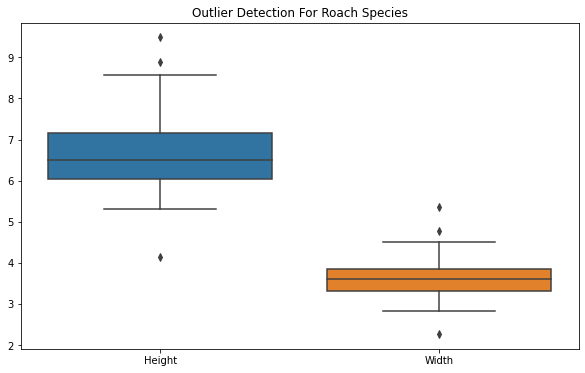

In [31]:
sns.boxplot(data = df_temp[df_temp.Species == 'Roach'])
plt.title('Outlier Detection For Roach Species')


In [33]:
df_roach = df2[df2.Species == 'Roach']
for column in df_roach.columns[1:]:
    print('\nOutliers in column "%s" ' % column)
    outlier = outlier_detection(df_roach[column])
    print(outlier)


Outliers in column "Weight" 
40      0.0
52    290.0
54    390.0
Name: Weight, dtype: float64

Outliers in column "Height" 
35    4.1472
52    8.8768
54    9.4850
Name: Height, dtype: float64

Outliers in column "Width" 
35    2.2680
53    4.7736
54    5.3550
Name: Width, dtype: float64
